In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorboard

In [8]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.16821098, -0.24562778,  0.65078396, -0.29308066, -0.33992457,
         0.186664  ,  0.12806782, -0.19283599,  0.09551544,  0.456701  ]],
      dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.10577592, 0.06992926, 0.17138214, 0.06668841, 0.0636365 ,
        0.10774592, 0.10161383, 0.07372013, 0.09835932, 0.14114855]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

2.2279794

In [23]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [24]:
model.fit(x_train, y_train, epochs=5,callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0663 - accuracy: 0.9787
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0571 - accuracy: 0.9815
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0510 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0467 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0436 - accuracy: 0.9855


In [25]:
%tensorboard --logdir logs/fit
model.evaluate(x_test,  y_test, verbose=2)

UsageError: Line magic function `%tensorboard` not found.


In [26]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [27]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.4439080e-08, 7.5980763e-11, 2.1034193e-08, 9.4912821e-06,
        2.0031736e-15, 4.4524299e-08, 1.6054803e-15, 9.9998856e-01,
        4.0899715e-09, 1.9578729e-06],
       [9.2043582e-13, 2.7304946e-05, 9.9997246e-01, 2.0647583e-07,
        2.2150778e-22, 9.9686759e-10, 4.0993910e-11, 1.0146610e-18,
        9.0901658e-10, 3.6296886e-20],
       [7.0534872e-10, 9.9982244e-01, 1.8394492e-06, 1.2008602e-08,
        4.5539309e-06, 4.5327667e-07, 1.8462390e-07, 5.1511324e-05,
        1.1876547e-04, 1.5781465e-07],
       [9.9998355e-01, 1.3720997e-11, 1.1497632e-05, 1.1494211e-07,
        4.0253600e-09, 1.6998364e-07, 6.3744261e-07, 1.9529343e-06,
        1.6066236e-08, 2.1078608e-06],
       [2.7870024e-09, 1.6860229e-13, 2.6012838e-08, 4.5199716e-10,
        9.9907744e-01, 5.4183308e-10, 7.5076110e-07, 2.4386118e-06,
        2.3954811e-09, 9.1935979e-04]], dtype=float32)>

In [28]:
model.save('Hand Digit Classifier.h5')

In [29]:
new_model=keras.models.load_model('Hand Digit Classifier.h5')

lable ->  0
prediction ->  0


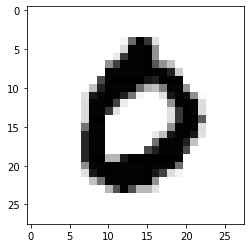

In [30]:
predictions=new_model.predict([x_test])
  
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()
print('lable -> ',y_test[3])
print('prediction -> ',np.argmax(predictions[3]))
  
draw(x_test[3])